In [1]:
import torch
from torch.utils.data import Dataset
import numpy as np

class PathDataset(Dataset):
    def __init__(self, num_samples=10000, grid_size=32, path_length=16):
        """
        Initializes the dataset for the Path task.
        
        Args:
            num_samples (int): Number of samples in the dataset.
            grid_size (int): Size of the grid (grid_size x grid_size).
            path_length (int): Minimum length of the path connecting the start and end.
        """
        self.num_samples = num_samples
        self.grid_size = grid_size
        self.path_length = path_length
        self.data, self.labels = self.generate_data()

    def generate_data(self):
        data = []
        labels = []
        
        for _ in range(self.num_samples):
            grid = np.zeros((self.grid_size, self.grid_size), dtype=np.float32)
            start = (np.random.randint(self.grid_size), np.random.randint(self.grid_size))
            end = (np.random.randint(self.grid_size), np.random.randint(self.grid_size))
            
            # Randomly block some cells
            num_blocks = np.random.randint(self.grid_size // 2, self.grid_size)
            for _ in range(num_blocks):
                x, y = np.random.randint(self.grid_size), np.random.randint(self.grid_size)
                if (x, y) != start and (x, y) != end:
                    grid[x, y] = 1  # Mark as blocked

            # Create the path from start to end
            path_exists = self.create_path(grid, start, end, self.path_length)
            data.append((grid, start, end))
            labels.append(path_exists)
        
        return data, torch.tensor(labels, dtype=torch.float32)

    def create_path(self, grid, start, end, min_length):
        """
        Attempts to create a valid path between start and end with a minimum path length.
        
        Args:
            grid (np.ndarray): The grid representing the problem.
            start (tuple): Starting coordinates.
            end (tuple): Ending coordinates.
            min_length (int): Minimum length of the path.
            
        Returns:
            bool: Whether a valid path was created.
        """
        # Implement path creation algorithm (e.g., DFS, BFS)
        # If successful, return True, else False
        # Placeholder for demonstration:
        return np.random.rand() > 0.5  # Randomly determine if path exists

    def __len__(self):
        return self.num_samples

    def __getitem__(self, idx):
        grid, start, end = self.data[idx]
        sample = {
            "grid": torch.tensor(grid, dtype=torch.float32),
            "start": torch.tensor(start, dtype=torch.int64),
            "end": torch.tensor(end, dtype=torch.int64)
        }
        label = self.labels[idx]
        return sample, label

class PathXDataset(PathDataset):
    def __init__(self, num_samples=10000, grid_size=32, path_length=16, dimensions=10):
        """
        Initializes the dataset for the Path-X task.
        
        Args:
            num_samples (int): Number of samples in the dataset.
            grid_size (int): Size of the grid (grid_size x grid_size).
            path_length (int): Minimum length of the path connecting the start and end.
            dimensions (int): Number of dimensions for the grid (default is 10).
        """
        super().__init__(num_samples, grid_size, path_length)
        self.dimensions = dimensions
        self.data, self.labels = self.generate_data()

    def generate_data(self):
        data = []
        labels = []
        
        for _ in range(self.num_samples):
            grid = np.zeros((self.grid_size,) * self.dimensions, dtype=np.float32)
            start = tuple(np.random.randint(self.grid_size) for _ in range(self.dimensions))
            end = tuple(np.random.randint(self.grid_size) for _ in range(self.dimensions))
            
            # Randomly block some cells
            num_blocks = np.random.randint(self.grid_size // 2, self.grid_size)
            for _ in range(num_blocks):
                coords = tuple(np.random.randint(self.grid_size) for _ in range(self.dimensions))
                if coords != start and coords != end:
                    grid[coords] = 1  # Mark as blocked

            # Create the path from start to end
            path_exists = self.create_path(grid, start, end, self.path_length)
            data.append((grid, start, end))
            labels.append(path_exists)
        
        return data, torch.tensor(labels, dtype=torch.float32)


In [2]:
p = PathDataset(grid_size=128)

{'grid': tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]), 'start': tensor([ 3, 46]), 'end': tensor([124,  29])} tensor(1.) 0.0 0.0
torch.Size([128, 128])


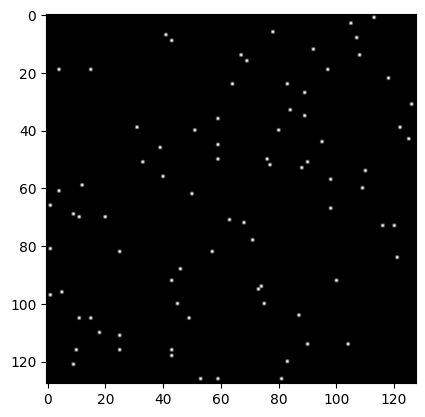

In [3]:
a = p.__getitem__(217)

img = a[0]['grid'].detach().cpu().numpy()

import matplotlib.pyplot as plt
print(a[0],a[1], img[16, 27], img[7, 29])
plt.imshow(img, cmap='gray')
print(a[0]['grid'].shape)